# Human Activity Recognition (HAR) explore

In [1]:
# Imports
import numpy as np
import os
from utils.utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
X_train, labels_train, list_ch_train = read_data(data_path="./data/", split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path="./data/", split="test") # test

assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [3]:
print ("Training data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_train.shape[0],
                                                                             X_train.shape[1],
                                                                             X_train.shape[2]))
print ("Test data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_test.shape[0],
                                                                         X_test.shape[1],
                                                                         X_test.shape[2]))

Training data shape: N = 7352, steps = 128, channels = 9
Test data shape: N = 2947, steps = 128, channels = 9


In [4]:
# Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[0],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[0],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=1)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=1)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


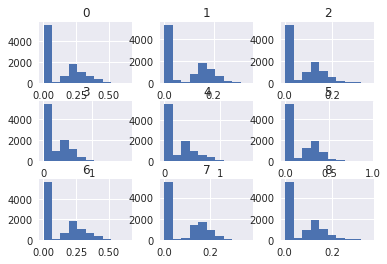

In [5]:
df_std.hist()
plt.show()

/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


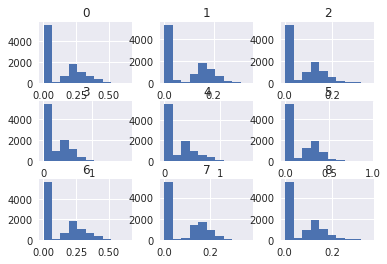

In [6]:
df_std.hist()
plt.show()

Some channels have mean values near 1, most close to 0. Let's standardize them all

In [7]:
X_train, X_test = standardize(X_train, X_test)

In [8]:
# Check Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[0],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[0],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=1)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=1)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)